In [3]:
# Numerical libraries
import numpy as np   
from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#regressor models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error

In [12]:
house_df=pd.read_csv("kc_house_data.csv")

In [13]:
house_df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [14]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [15]:
missing_values = ["n/a", "na", "--","NAN", "?"]
house_df = house_df.replace(missing_values, np.nan)
house_df.isna().any()

# so the data set doesnto have any missing values 

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

# EDA and few initial observation of feature set and trying to remove which is not useful

In [16]:
#dropping the id column
house_df=house_df.drop(['id'],axis=1)
house_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


working with all the date columns

In [17]:

house_df['date'].astype(str).str.slice(0,4).unique()
#all houses are sold in 2014-2015 so . it should not affect the price of house , so we are dropping the date column
house_df=house_df.drop(['date'],axis=1)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [18]:
import datetime
now = datetime.datetime.now()
#calculating the age of the property and keeing the age in a new column called property_age
house_df['property_age'] = now.year - house_df['yr_built']


In [19]:
house_df.head()
#as we have already calculate the age of property hence we can drop yr_built
house_df=house_df.drop(['yr_built'],axis=1)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,property_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,98178,47.5112,-122.257,1340,5650,64
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,98125,47.7210,-122.319,1690,7639,68
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,98028,47.7379,-122.233,2720,8062,86
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,98136,47.5208,-122.393,1360,5000,54
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,98074,47.6168,-122.045,1800,7503,32


In [20]:
#age of renovation
house_df['renovated_age'] = now.year - house_df['yr_renovated']
house_df.head()
#for index, row in house_df.iterrows():
#   if (row['renovated_age']== 2019):
#        row['renovated_age']=row['property_age']
house_df.renovated_age.replace(2019,house_df.property_age,inplace=True)

In [21]:
house_df=house_df.drop(['yr_renovated'],axis=1)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,property_age,renovated_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,64,64
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,68,28
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,86,86
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,54,54
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,32,32


working with bedrooms, bathrooms and floors

In [22]:
import math
print(house_df['bathrooms'].unique())
#usually bathrooms cannot be in float values so rounding it off
house_df['bathrooms'] = np.ceil(house_df['bathrooms']).astype(int)
print(house_df['bathrooms'].unique())

[1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
[1 3 2 5 4 0 6 7 8]


In [23]:
print(house_df['bedrooms'].unique())
house_df['bedrooms'] = np.ceil(house_df['bedrooms']).astype(int)
print(house_df['bedrooms'].unique())

[ 3  2  4  5  1  6  7  0  8  9 11 10 33]
[ 3  2  4  5  1  6  7  0  8  9 11 10 33]


In [24]:
print(house_df['floors'].unique())
house_df['floors'] = np.ceil(house_df['floors']).astype(int)
print(house_df['floors'].unique())

[1.  2.  1.5 3.  2.5 3.5]
[1 2 3 4]


In [25]:
house_df.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,property_age,renovated_age
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,64,64
1,538000.0,3,3,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,68,28
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,86,86
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,54,54
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,32,32
5,1225000.0,4,5,5420,101930,1,0,0,3,11,3890,1530,98053,47.6561,-122.005,4760,101930,18,18
6,257500.0,3,3,1715,6819,2,0,0,3,7,1715,0,98003,47.3097,-122.327,2238,6819,24,24
7,291850.0,3,2,1060,9711,1,0,0,3,7,1060,0,98198,47.4095,-122.315,1650,9711,56,56
8,229500.0,3,1,1780,7470,1,0,0,3,7,1050,730,98146,47.5123,-122.337,1780,8113,59,59
9,323000.0,3,3,1890,6560,2,0,0,3,7,1890,0,98038,47.3684,-122.031,2390,7570,16,16


working with zipcode

In [26]:
#converting zip to a region column and encoding with label encoder
#house=house_df.copy()
house_df['region'] =house_df['zipcode'] // 100.
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,property_age,renovated_age,region
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,98178,47.5112,-122.257,1340,5650,64,64,981
1,538000.0,3,3,2570,7242,2,0,0,3,7,2170,400,98125,47.7210,-122.319,1690,7639,68,28,981
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,98028,47.7379,-122.233,2720,8062,86,86,980
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,98136,47.5208,-122.393,1360,5000,54,54,981
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,98074,47.6168,-122.045,1800,7503,32,32,980


In [27]:
# Label Encoding:
from sklearn.preprocessing import LabelEncoder

LB = LabelEncoder()
LB.fit(house_df['region'])
house_df['region'] = LB.transform(house_df['region'])


In [28]:
house_df=house_df.drop(['zipcode'],axis=1)
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,property_age,renovated_age,region
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,64,64,1
1,538000.0,3,3,2570,7242,2,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,68,28,1
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,47.7379,-122.233,2720,8062,86,86,0
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,54,54,1
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,32,32,0


In [29]:
def plot_correlation(df, method='pearson', min_periods=1, figsize=(20, 16)):
    """
    Plot the bottom half below the diagonal of the pairwise correlation between numeric
    columns, excluding NA/null values
    
    df : Dataframe with the data
    
    method : str; Default='pearson'. Allowed={‘pearson’, ‘kendall’, ‘spearman’}
             - pearson : standard correlation coefficient
             - kendall : Kendall Tau correlation coefficient
             - spearman : Spearman rank correlation
    
    min_periods : int; Default=1
                  Minimum number of observations required per pair of columns to have a 
                  valid result. Currently only available for pearson and spearman correlation.
    
    figsize : Tuple of ints - (width, height); Default=(10,8)
    """
    corr = df.corr(method=method, min_periods=min_periods)

    plt.figure(figsize=figsize)
    cmap = cmap=sns.diverging_palette(250, 5,n=9, as_cmap=True)
    sns.heatmap(np.tril(corr), 
                vmin=-1, 
                vmax=1,
                center=0,
                cmap=cmap, 
                annot=True,
                cbar=True,
                square=True,
                xticklabels=corr.columns,
                yticklabels=corr.columns)
    plt.show()

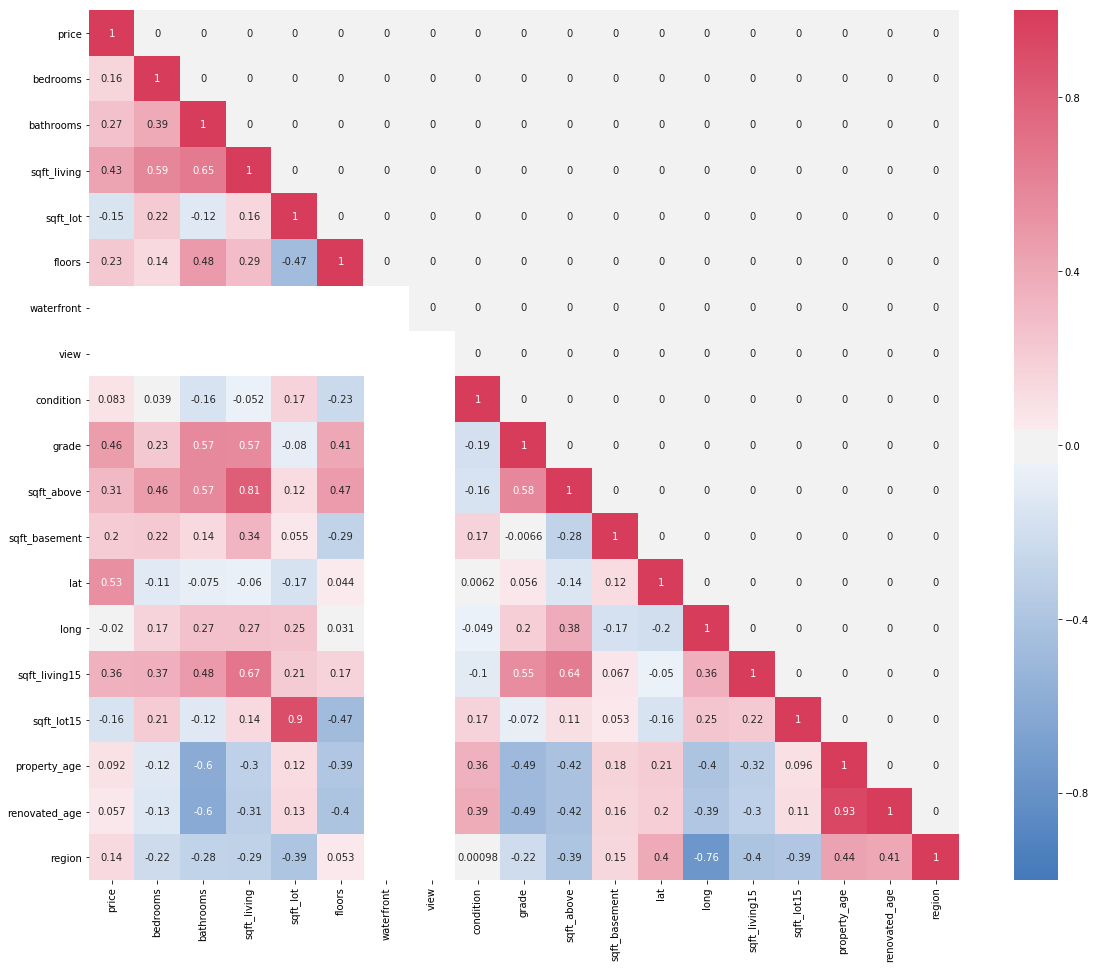

In [127]:
plot_correlation(house_df)
#features which can be picked up from correlation matrix are bathrooms,sqft_living,grade,sqft_above and sqft_living15 which 
#seem to be contributing more on the price of the data

Data visualization with important features

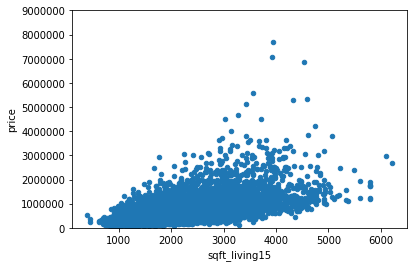

In [98]:
var = 'sqft_living15'
temp_data = pd.concat([house_df['price'], house_df[var]], axis=1)
temp_data.plot.scatter(x=var, y='price', ylim=(3,9000000));

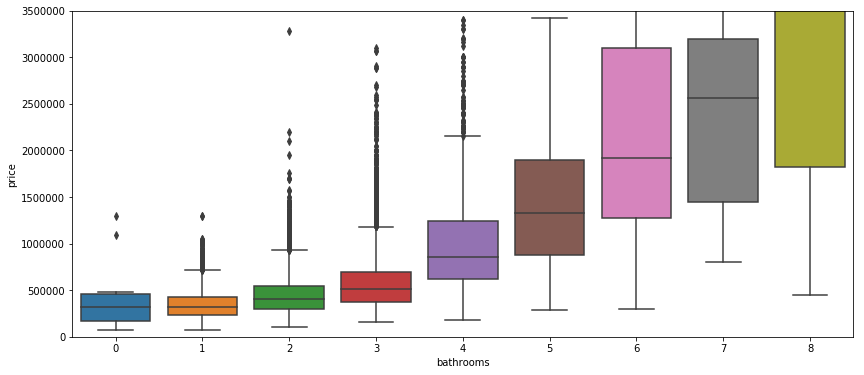

In [103]:
var = 'bathrooms'
temp_data = pd.concat([house_df['price'], house_df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=temp_data)
fig.axis(ymin=0, ymax=3500000);

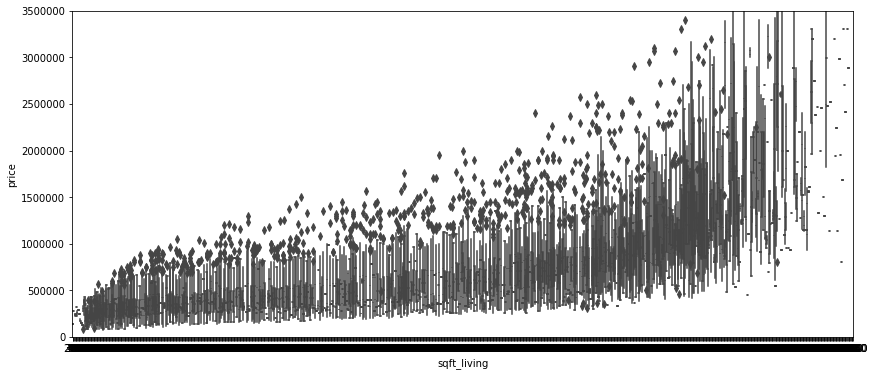

In [104]:
var = 'sqft_living'
temp_data = pd.concat([house_df['price'], house_df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=temp_data)
fig.axis(ymin=0, ymax=3500000);

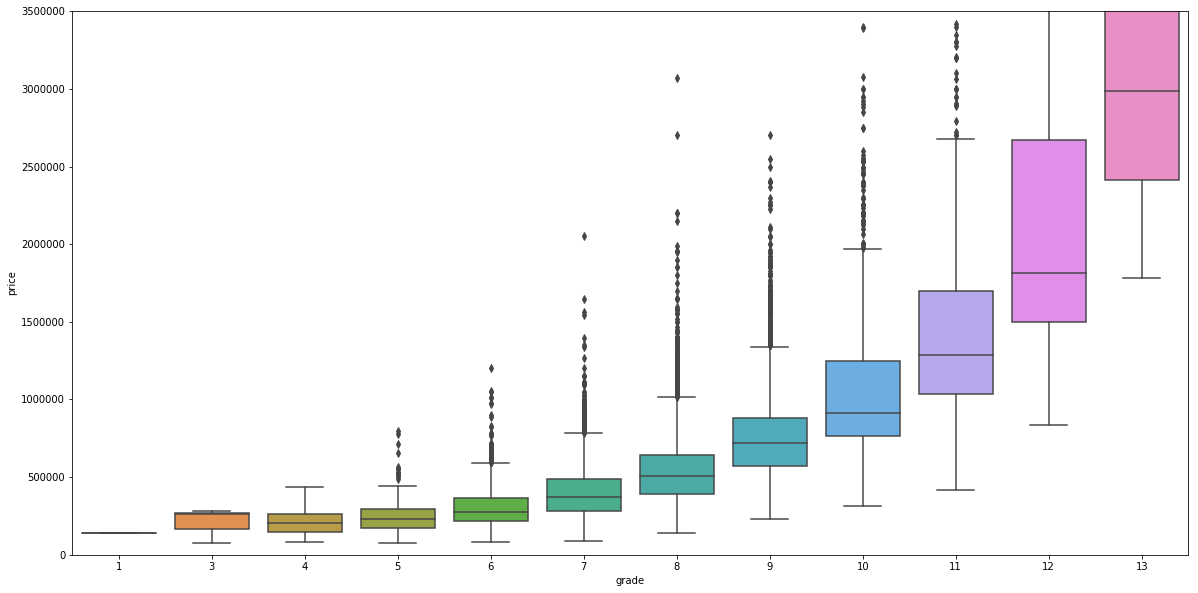

In [107]:
var = 'grade'
temp_data = pd.concat([house_df['price'], house_df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="price", data=temp_data)
fig.axis(ymin=0, ymax=3500000);

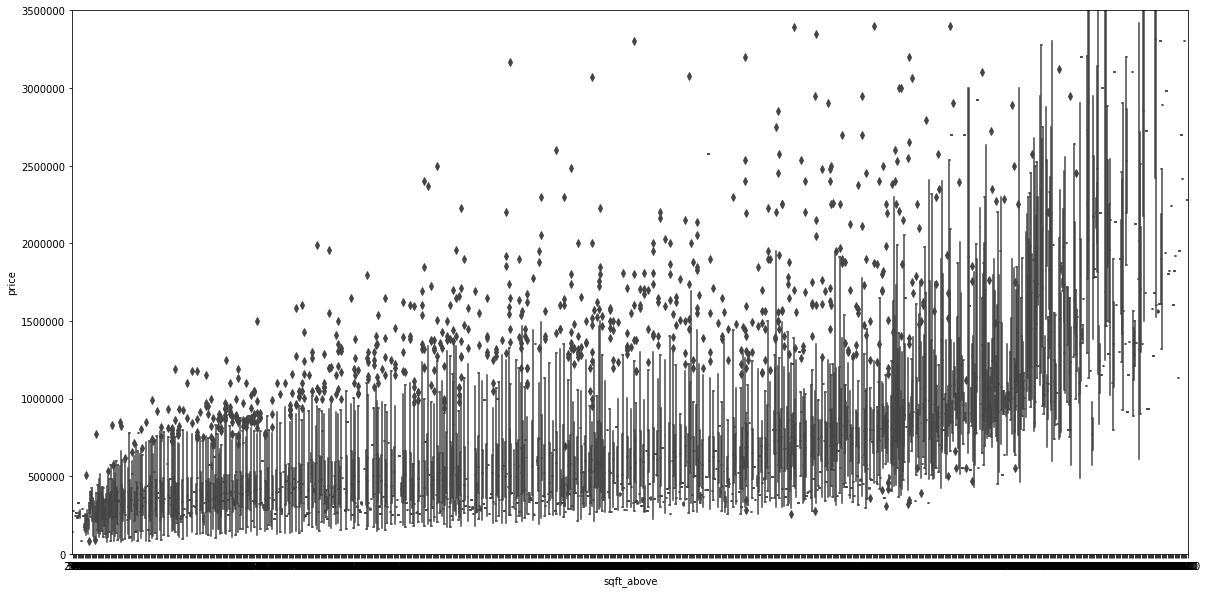

In [109]:

var = 'sqft_above'
temp_data = pd.concat([house_df['price'], house_df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="price", data=temp_data)
fig.axis(ymin=0, ymax=3500000);

Outlier Analysis

In [30]:
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,property_age,renovated_age,region
0,221900.0,3,1,1180,5650,1,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,64,64,1
1,538000.0,3,3,2570,7242,2,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,68,28,1
2,180000.0,2,1,770,10000,1,0,0,3,6,770,0,47.7379,-122.233,2720,8062,86,86,0
3,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,54,54,1
4,510000.0,3,2,1680,8080,1,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,32,32,0


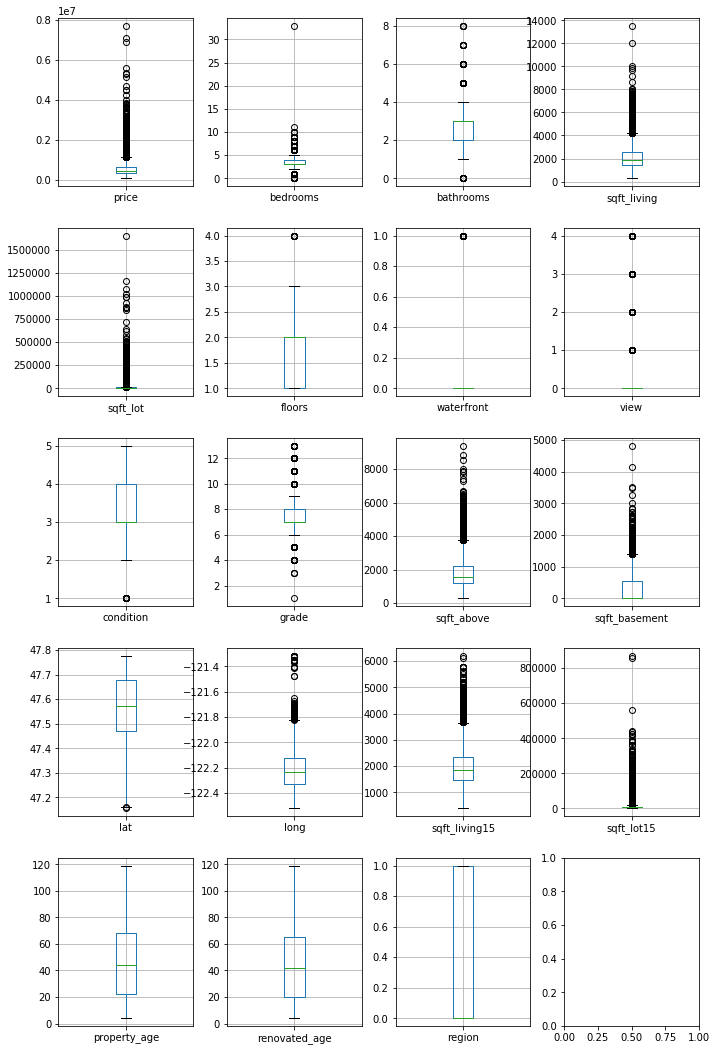

In [31]:
fig, axes = plt.subplots(5,4,figsize=(10, 10))
fig.subplots_adjust(left=0.1, bottom=0.1,right=0.99, top=1.5, wspace=0.25, hspace=0.25)
for i, el in enumerate(list(house_df.columns.values)[:]):
    a = house_df.boxplot(el,ax=axes.flatten()[i])

In [32]:
q1 = house_df.quantile(0.25)
q3 = house_df.quantile(0.75)
iqr=q3-q1
cap1 = q1-1.5*iqr
cap2 = q3+1.5*iqr
house_df = house_df[(house_df>=cap1) & (house_df<=cap2)]
house_df = house_df.dropna(axis=0)
    
print(house_df.shape)

(15463, 19)


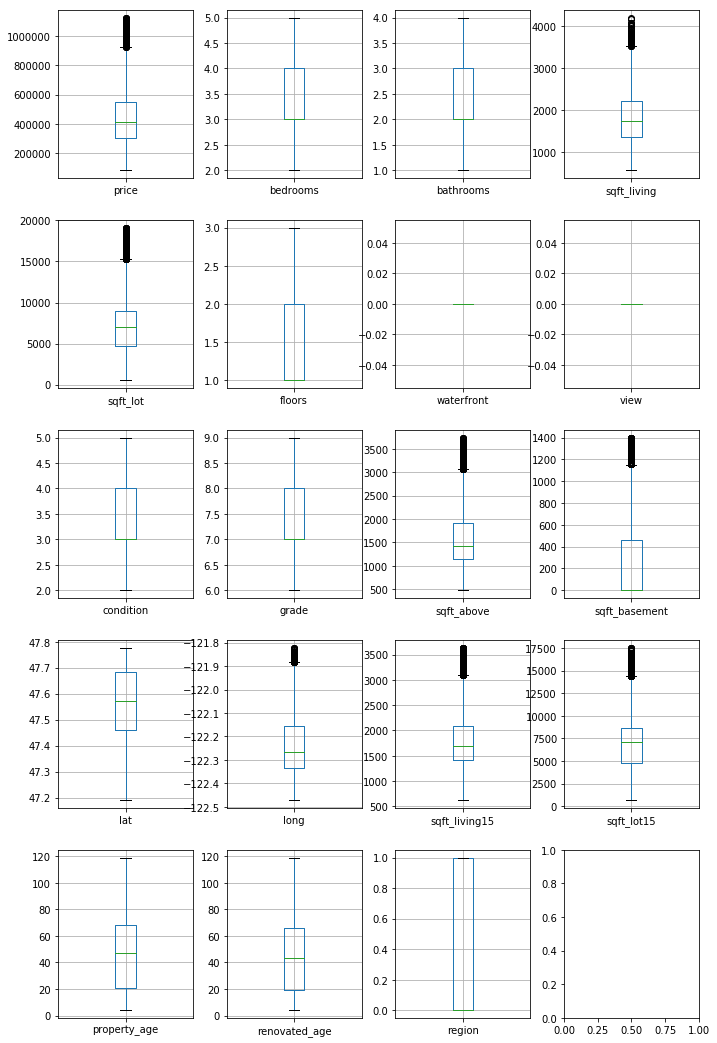

In [33]:
fig, axes = plt.subplots(5,4,figsize=(10, 10))
fig.subplots_adjust(left=0.1, bottom=0.1,right=0.99, top=1.5, wspace=0.25, hspace=0.25)
for i, el in enumerate(list(house_df.columns.values)[:]):
    a = house_df.boxplot(el,ax=axes.flatten()[i])

Model selection with various regression models

In [34]:
house_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,property_age,renovated_age,region
0,221900.0,3.0,1.0,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,47.5112,-122.257,1340.0,5650.0,64,64,1
1,538000.0,3.0,3.0,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,47.7210,-122.319,1690.0,7639.0,68,28,1
2,180000.0,2.0,1.0,770.0,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,47.7379,-122.233,2720.0,8062.0,86,86,0
3,604000.0,4.0,3.0,1960.0,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,47.5208,-122.393,1360.0,5000.0,54,54,1
4,510000.0,3.0,2.0,1680.0,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,47.6168,-122.045,1800.0,7503.0,32,32,0


In [36]:
#splitting dataframe into dependent and independent columns
Y=house_df[['price']]
X=house_df.drop(['price'],axis=1)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [38]:
#scaling data

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled) # Creating dataframe
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled) # Creating dataframe

F:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [39]:
#linear regression
regression_model = LinearRegression()
regression_model.fit(x_train_scaled, y_train)
print("Linear regression training score.........",regression_model.score(x_train_scaled, y_train))
lscore=regression_model.score(x_test_scaled, y_test)
print("Linear regression testing score.......",lscore)

#train MSE
predictedPrice = regression_model.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice = regression_model.predict(x_test_scaled)
lmse=mean_squared_error(predictedPrice, y_test)
print(lmse)

Linear regression training score......... 0.6528255426137232
Linear regression testing score....... 0.6563839662743274
11570977464.608885
12034652805.536657


In [40]:
#random forest regression
randomForest_model = RandomForestRegressor(n_estimators = 100,random_state=10)
randomForest_model.fit(x_train_scaled, y_train)

print("RandomForest as regressor training score.........",randomForest_model.score(x_train_scaled, y_train))
rscore=randomForest_model.score(x_test_scaled, y_test)
print("RandomForest as regressor testing score.......",rscore)

#train MSE
predictedPrice = randomForest_model.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice = randomForest_model.predict(x_test_scaled)
rfmse=mean_squared_error(predictedPrice, y_test)
print(rfmse)

F:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForest as regressor training score......... 0.9786769625880855
RandomForest as regressor testing score....... 0.8659899874801944
710675512.3282574
4693506166.330528


In [41]:
from sklearn.tree  import DecisionTreeRegressor
decisionTree=DecisionTreeRegressor()
decisionTree.fit(x_train_scaled, y_train)
print("DecisionTree as regressor training score.........",decisionTree.score(x_train_scaled, y_train))
dscore=decisionTree.score(x_test_scaled, y_test)
print("DecisionTree as regressor testing score.......",dscore)

#train MSE
predictedPrice = decisionTree.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice =decisionTree.predict(x_test_scaled)
dmse=mean_squared_error(predictedPrice, y_test)
print(dmse)

DecisionTree as regressor training score......... 0.9968249444559434
DecisionTree as regressor testing score....... 0.7352995244482136
105821425.99357316
9270749930.340609


In [42]:
from sklearn.ensemble import AdaBoostRegressor

ada_boost=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential').fit(x_train_scaled, y_train)

print("AdaBoost as regressor training score.........",ada_boost.score(x_train_scaled, y_train))
ascore=ada_boost.score(x_test_scaled, y_test)
print("AdaBoost as regressor testing score.......",ascore)

#train MSE
predictedPrice = decisionTree.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice =decisionTree.predict(x_test_scaled)
amse=mean_squared_error(predictedPrice, y_test)
print(amse)
#exp_ada = explained_variance_score(predict,y_test)

F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost as regressor training score......... 0.7378469525962053
AdaBoost as regressor testing score....... 0.7279603497229985
105821425.99357316
9270749930.340609


In [43]:
from sklearn.ensemble import GradientBoostingRegressor

gra_boost=GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(x_train_scaled, y_train)
print("GradientBoost as regressor training score.........",gra_boost.score(x_train_scaled, y_train))
gscore=gra_boost.score(x_test_scaled, y_test)
print("GradientBoost as regressor testing score.......",gscore)

#train MSE
predictedPrice = gra_boost.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice =gra_boost.predict(x_test_scaled)
gmse=mean_squared_error(predictedPrice, y_test)
print(gmse)

F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoost as regressor training score......... 0.9478355660613254
GradientBoost as regressor testing score....... 0.8776021582676811
1738588414.8928275
4286806740.1402845


In [44]:
## Comparing Models on the basis of Model's Accuracy Score and Mean squared error of different models
models_cross = pd.DataFrame({
    'Model': ['Linear regression','RandomForest','DecisionTree','AdaBoostRegressor','GradientBoost'],
    'Score': [lscore,rscore,dscore,ascore,gscore],
    'MSE': [lmse,rfmse,dmse,amse,gmse]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score,MSE
4,GradientBoost,0.877602,4.286807e+09
1,RandomForest,0.865990,4.693506e+09
2,DecisionTree,0.735300,9.270750e+09
3,AdaBoostRegressor,0.727960,9.270750e+09
0,Linear regression,0.656384,1.203465e+10


In [ ]:
#from the above table we can infer that GradientBoosting classifier is the best choice as its accuracy is highest  
#without feature selection


Feature Selection

In [47]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [46]:
sfs1 = sfs(regression_model, k_features=7, forward=True, scoring='r2', cv=5)
sfs1 = sfs1.fit(x_train_scaled.values, y_train.values)
sfs1.get_metric_dict()

{1: {'feature_idx': (8,),
  'cv_scores': array([0.29682581, 0.26640413, 0.25004086, 0.31587835, 0.27851655]),
  'avg_score': 0.28153313854396245,
  'feature_names': ('8',),
  'ci_bound': 0.029551683735757197,
  'std_dev': 0.02299221391424326,
  'std_err': 0.011496106957121627},
 2: {'feature_idx': (8, 11),
  'cv_scores': array([0.48634243, 0.48127439, 0.47062597, 0.51732999, 0.48045814]),
  'avg_score': 0.48720618235853086,
  'feature_names': ('8', '11'),
  'ci_bound': 0.020434227909697886,
  'std_dev': 0.015898523531628315,
  'std_err': 0.007949261765814158},
 3: {'feature_idx': (2, 8, 11),
  'cv_scores': array([0.56643947, 0.55691048, 0.54378282, 0.58831258, 0.56225599]),
  'avg_score': 0.5635402667967722,
  'feature_names': ('2', '8', '11'),
  'ci_bound': 0.01869674795441605,
  'std_dev': 0.014546705098514384,
  'std_err': 0.007273352549257191},
 4: {'feature_idx': (2, 8, 11, 15),
  'cv_scores': array([0.60924445, 0.61786858, 0.59957478, 0.63642588, 0.62738476]),
  'avg_score': 0.61

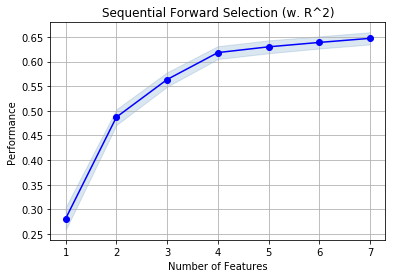

In [48]:
fig = plot_sfs(sfs1.get_metric_dict())

plt.title('Sequential Forward Selection (w. R^2)')
plt.grid()
plt.show()

In [49]:
columnList = list(x_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

[2, 7, 8, 11, 13, 14, 15]
['sqft_living', 'condition', 'grade', 'lat', 'sqft_living15', 'sqft_lot15', 'property_age']


In [50]:
#important feature selected by fwd selection are sqft_living,condition,grade,lat,sqft_living15,sqft_lot15,property_age

Building regression models using  the reduced features


In [64]:
#splitting dataframe into dependent and independent columns
Y=house_df[['price']]
X=house_df[['sqft_living','condition','grade','lat','sqft_living15','sqft_lot15','property_age']]

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

In [66]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_train_scaled = pd.DataFrame(x_train_scaled) # Creating dataframe
x_test_scaled = scaler.transform(x_test)
x_test_scaled = pd.DataFrame(x_test_scaled) # Creating dataframe

F:\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
F:\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
F:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [67]:
#linear regression
sfs_linreg_model = LinearRegression()
sfs_linreg_model.fit(x_train_scaled, y_train)
print("Linear regression training score.........",sfs_linreg_model.score(x_train_scaled, y_train))
lscore=sfs_linreg_model.score(x_test_scaled, y_test)
print("Linear regression testing score.......",lscore)

#train MSE
predictedPrice = sfs_linreg_model.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice = sfs_linreg_model.predict(x_test_scaled)
lmse_sfs=mean_squared_error(predictedPrice, y_test)
print(lmse_sfs)

Linear regression training score......... 0.6477210659720436
Linear regression testing score....... 0.6510476203270641
11741104566.22276
12221550576.368908


In [68]:
#random forest regression
random_sfs_model = RandomForestRegressor(n_estimators = 100,random_state=10)
random_sfs_model.fit(x_train_scaled, y_train)

print("RandomForest as regressor training score.........",random_sfs_model.score(x_train_scaled, y_train))
rscore=random_sfs_model.score(x_test_scaled, y_test)
print("RandomForest as regressor testing score.......",rscore)

#train MSE
predictedPrice = random_sfs_model.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice = random_sfs_model.predict(x_test_scaled)
rfmse=mean_squared_error(predictedPrice, y_test)
print(rfmse)

F:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForest as regressor training score......... 0.9740157697953927
RandomForest as regressor testing score....... 0.8309197050159777
866028406.5719546
5921791903.386383


In [69]:
from sklearn.tree  import DecisionTreeRegressor
dec_sfs_Tree=DecisionTreeRegressor()
dec_sfs_Tree.fit(x_train_scaled, y_train)
print("DecisionTree as regressor training score.........",dec_sfs_Tree.score(x_train_scaled, y_train))
dscore=dec_sfs_Tree.score(x_test_scaled, y_test)
print("DecisionTree as regressor testing score.......",dscore)

#train MSE
predictedPrice = dec_sfs_Tree.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice =dec_sfs_Tree.predict(x_test_scaled)
dmse=mean_squared_error(predictedPrice, y_test)
print(dmse)

DecisionTree as regressor training score......... 0.9967929293628077
DecisionTree as regressor testing score....... 0.6802944835410909
106888457.03032877
11197221645.56926


In [77]:
from sklearn.ensemble import AdaBoostRegressor

ada_sfs_boost=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential').fit(x_train_scaled, y_train)

print("AdaBoost as regressor training score.........",ada_sfs_boost.score(x_train_scaled, y_train))
ascore=ada_sfs_boost.score(x_test_scaled, y_test)
print("AdaBoost as regressor testing score.......",ascore)

#train MSE
predictedPrice = ada_sfs_boost.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice =ada_sfs_boost.predict(x_test_scaled)
amse=mean_squared_error(predictedPrice, y_test)
print(amse)
#exp_ada = explained_variance_score(predict,y_test)

F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoost as regressor training score......... 0.7267595765561086
AdaBoost as regressor testing score....... 0.7192544185467585
9106830052.798788
9832706474.27254


In [78]:
gra_sfs_boost=GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='ls',min_samples_split=2,learning_rate=0.1).fit(x_train_scaled, y_train)
print("GradientBoost as regressor training score.........",gra_sfs_boost.score(x_train_scaled, y_train))
g_sfs_score=gra_sfs_boost.score(x_test_scaled, y_test)
print("GradientBoost as regressor testing score.......",g_sfs_score)

#train MSE
predictedPrice = gra_sfs_boost.predict(x_train_scaled)
print(mean_squared_error(predictedPrice, y_train))

#test MSE
predictedPrice =gra_sfs_boost.predict(x_test_scaled)
g_sfs_mse=mean_squared_error(predictedPrice, y_test)
print(g_sfs_mse)

F:\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoost as regressor training score......... 0.9202371306285728
GradientBoost as regressor testing score....... 0.8356603044255213
2658416667.394519
5755759290.282139


In [79]:
## Comparing Models on the basis of Model's Accuracy Score and Mean squared error of different models
models_cross = pd.DataFrame({
    'Model': ['Linear regression','RandomForest','DecisionTree','AdaBoostRegressor','GradientBoost'],
    'Score': [lscore,rscore,dscore,ascore,g_sfs_score],
    'MSE': [lmse,rfmse,dmse,amse,g_sfs_mse]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score,MSE
4,GradientBoost,0.835660,5.755759e+09
1,RandomForest,0.830920,5.921792e+09
3,AdaBoostRegressor,0.719254,9.832706e+09
2,DecisionTree,0.680294,1.119722e+10
0,Linear regression,0.651048,1.203465e+10


Conclusion

So, we have seen that accuracy of gradient boosting is around 83.56 and also MSE  is very high 5.755759e+09 .
Therefore, it is inferred that Gradient Boosting is the suitable model for this dataset.